In [ ]:
# Pyresample

[Pyresample](http://github.com/pytroll/pyresample)

[Docs](http://pyresample.readthedocs.org/en/latest/)

In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
from pyresample import geometry, kd_tree

In [39]:
# Define area
area_def = geometry.AreaDefinition(
    area_id = 'Istjenesten polar stereographic',
    name = 'istjenesten_stere_north_3k',
    proj_id = 'stere',
    proj_dict = {'a' : '6371228.0',
                 'units' : 'm',
                 'lon_0' : '0',
                 'proj'  : 'stere',
                 'lat_0' : '90',
                 'lat_ts': '90'},
    x_size = 2432,
    y_size = 3584,
    area_extent =(-3850000.0, -5350000.0, 3750000.0, 5850000.0)
    )


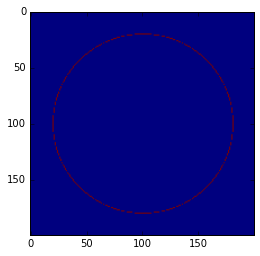

In [77]:
# Get swath definition
xx, yy = mgrid[:200, :200]
circle = (xx - 100) ** 2 + (yy - 100) ** 2
donut_data = logical_and(circle < (6400 + 60), circle > (6400 - 60))

lon_range = linspace(25., 35., 200)
lat_range = linspace(55., 65., 200)
lons, lats = meshgrid(lon_range, lat_range)


swath_def = geometry.SwathDefinition(lons=lons,
                                     lats=lats)

imshow(donut_data)

In [74]:
# Resample swath to grid
result = kd_tree.resample_nearest(swath_def,
                                  donut_data,
                                  area_def,
                                  radius_of_influence=7000)

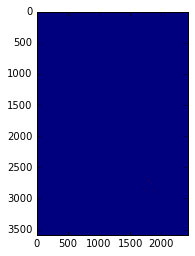

In [75]:
imshow(result)